In [2]:
from pathlib import Path  
from matplotlib import pyplot as plot
from pathlib import Path  
import pandas as pandas
import numpy as numpy
import seaborn as seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [3]:
dataframe = pandas.read_csv("dataset.csv").dropna()
dataframe["date"] = pandas.to_datetime(dataframe['date'], format='%Y-%m-%d %H:%M:%S')
dataframe["NSM"] = (dataframe["date"] - pandas.to_datetime(dataframe['date'].dt.date, format='%Y-%m-%d')).dt.total_seconds()
dataframe["week_status"] = dataframe["date"].apply(lambda date: 1 if(date.weekday() <= 4) else 0)
dataframe["day_of_monday"] = dataframe["date"].apply(lambda date: date.weekday() == 0)
dataframe["day_of_tuesday"] = dataframe["date"].apply(lambda date: date.weekday() == 1)
dataframe["day_of_wednesday"] = dataframe["date"].apply(lambda date: date.weekday() == 2)
dataframe["day_of_thursday"] = dataframe["date"].apply(lambda date: date.weekday() == 3)
dataframe["day_of_friday"] = dataframe["date"].apply(lambda date: date.weekday() == 4)
dataframe["day_of_saturday"] = dataframe["date"].apply(lambda date: date.weekday() == 5)
dataframe["day_of_sunday"] = dataframe["date"].apply(lambda date: date.weekday() == 6)
dataframe = dataframe.drop("date", axis = 1).dropna()
dataframe.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,rv2,NSM,week_status,day_of_monday,day_of_tuesday,day_of_wednesday,day_of_thursday,day_of_friday,day_of_saturday,day_of_sunday
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,13.275433,61200.0,1,True,False,False,False,False,False,False
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.606195,61800.0,1,True,False,False,False,False,False,False
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,28.642668,62400.0,1,True,False,False,False,False,False,False
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.410389,63000.0,1,True,False,False,False,False,False,False
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,10.084097,63600.0,1,True,False,False,False,False,False,False


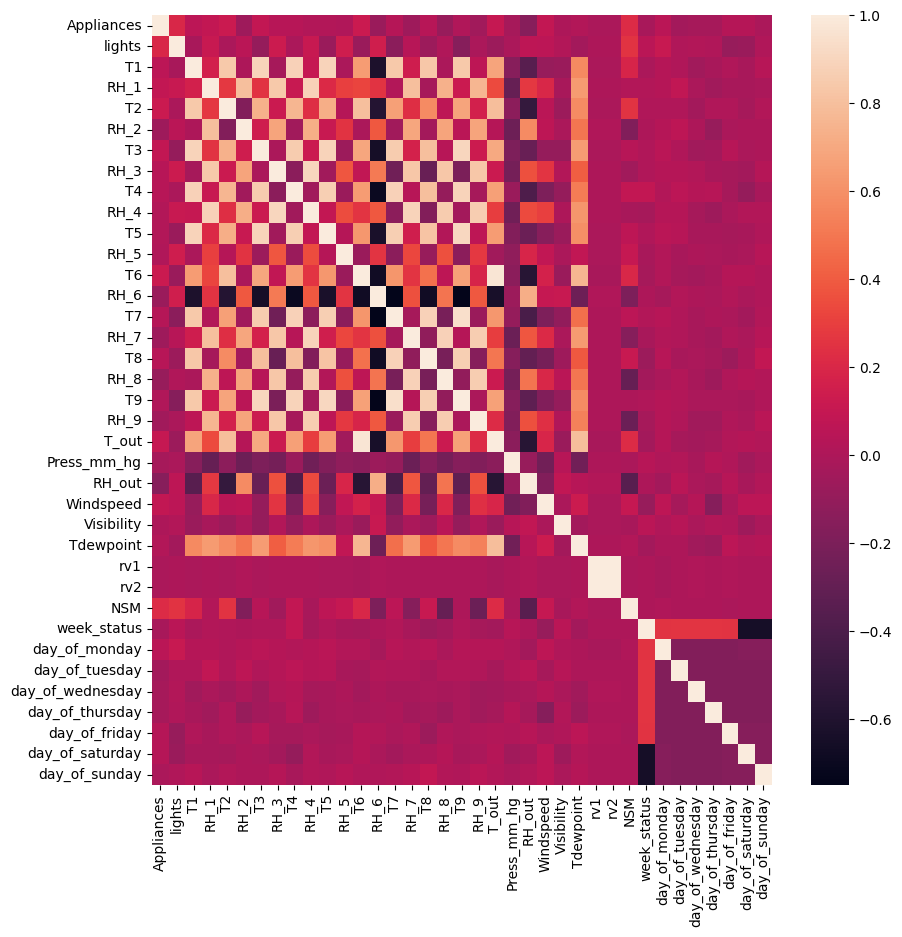

In [34]:
plot.figure(figsize=(10, 10))
seaborn.heatmap(round(dataframe.corr(), 2), xticklabels=dataframe.columns, yticklabels=dataframe.columns)
plot.show()

Appliances          1.00000
NSM                 0.21715
lights              0.19728
T2                  0.12007
T6                  0.11764
T_out               0.09915
Windspeed           0.08712
RH_1                0.08603
T3                  0.08506
T1                  0.05545
day_of_monday       0.05431
T4                  0.04028
T8                  0.03957
RH_3                0.03629
day_of_saturday     0.03346
day_of_friday       0.02773
T7                  0.02580
T5                  0.01976
RH_4                0.01697
Tdewpoint           0.01535
T9                  0.01001
RH_5                0.00695
Visibility          0.00023
day_of_sunday      -0.01087
rv1                -0.01114
rv2                -0.01114
week_status        -0.01744
day_of_thursday    -0.02928
day_of_wednesday   -0.03131
Press_mm_hg        -0.03488
day_of_tuesday     -0.04262
RH_9               -0.05146
RH_7               -0.05564
RH_2               -0.06046
RH_6               -0.08318
RH_8               -

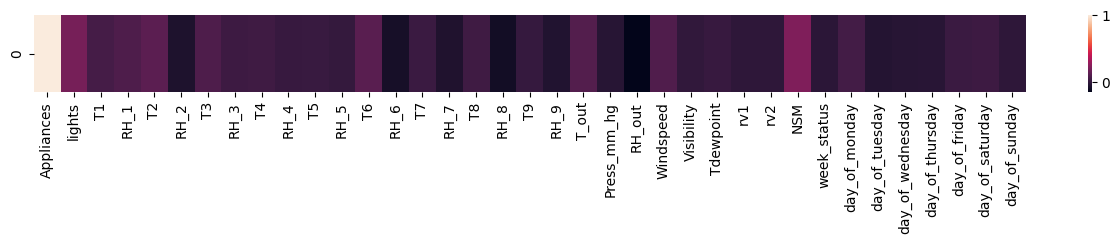

In [35]:
plot.figure(figsize=(16, 1))
axes = seaborn.heatmap([round(dataframe.corrwith(dataframe["Appliances"]), 5)], xticklabels=dataframe.columns)
print(round(dataframe.corrwith(dataframe["Appliances"]).sort_values(ascending=False), 5))